<a href="https://colab.research.google.com/github/mangotraabhi/Projects/blob/main/Adult-child-detection-yolov8n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installing Ultralytics library
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.0/872.0 kB 3.3 MB/s eta 0:00:00


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="nfBDjbhZIESZICEXpniP")
project = rf.workspace("a-4euhx").project("children-vs-adults-yolo-my3ct")
version = project.version(2)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.86, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Children-vs-Adults-yolo-2 in yolov8:: 100%|██████████| 2704/2704 [00:00<00:00, 7474.76it/s]


In [3]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model

100%|██████████| 6.25M/6.25M [00:00<00:00, 111MB/s]


In [5]:
# Train the model
results = model.train(data="/content/data.yaml", epochs=100, imgsz=640)

Ultralytics YOLOv8.2.86 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

100%|██████████| 755k/755k [00:00<00:00, 19.1MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
train: Scanning /content/Children-vs-Adults-yolo-2/train/labels... 1205 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1205/1205 [00:00<00:00, 2215.92it/s]

train: New cache created: /content/Children-vs-Adults-yolo-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Children-vs-Adults-yolo-2/valid/labels... 91 images, 0 backgrounds, 0 corrupt: 100%|██████████| 91/91 [00:00<00:00, 1903.42it/s]

val: New cache created: /content/Children-vs-Adults-yolo-2/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.37G      1.026      2.133      1.459         15        640: 100%|██████████| 76/76 [00:27<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]

                   all         91        133      0.333      0.675        0.4      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       2.2G      1.134      1.806      1.526         16        640: 100%|██████████| 76/76 [00:23<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.57it/s]

                   all         91        133      0.361      0.491      0.329       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.21G      1.189      1.749      1.567         18        640: 100%|██████████| 76/76 [00:20<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]

                   all         91        133      0.302      0.533      0.351      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.21G      1.223      1.683      1.594         18        640: 100%|██████████| 76/76 [00:22<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]

                   all         91        133       0.41       0.55      0.428       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.21G      1.223      1.623      1.584         11        640: 100%|██████████| 76/76 [00:22<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]


                   all         91        133      0.456      0.577      0.468      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.21G      1.181      1.535      1.551         23        640: 100%|██████████| 76/76 [00:21<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]

                   all         91        133      0.627      0.556      0.658      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.21G      1.151      1.473      1.538         16        640: 100%|██████████| 76/76 [00:23<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]

                   all         91        133      0.604      0.528      0.571      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.19G      1.136      1.404        1.5         17        640: 100%|██████████| 76/76 [00:21<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.88it/s]

                   all         91        133      0.596      0.588      0.587       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.21G      1.128      1.393      1.498         14        640: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all         91        133      0.567      0.572       0.59      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       2.2G      1.111      1.339      1.488         18        640: 100%|██████████| 76/76 [00:21<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]

                   all         91        133      0.582      0.687      0.722      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.21G      1.096      1.301      1.465         18        640: 100%|██████████| 76/76 [00:21<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]

                   all         91        133      0.598      0.719      0.683      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.19G      1.078      1.287      1.467         12        640: 100%|██████████| 76/76 [00:21<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all         91        133      0.486      0.636      0.602      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       2.2G      1.083      1.277      1.467         13        640: 100%|██████████| 76/76 [00:21<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all         91        133      0.556      0.629       0.62      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.21G      1.036       1.22      1.431         14        640: 100%|██████████| 76/76 [00:24<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]


                   all         91        133      0.654      0.584      0.659      0.402

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       2.2G      1.031      1.218      1.435         16        640: 100%|██████████| 76/76 [00:21<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all         91        133       0.63      0.693      0.706      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.21G      1.048      1.219       1.44         19        640: 100%|██████████| 76/76 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all         91        133      0.595      0.759       0.71      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       2.2G      1.017      1.188      1.412         15        640: 100%|██████████| 76/76 [00:21<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]

                   all         91        133      0.586      0.624      0.661      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       2.2G      1.003      1.185      1.401         15        640: 100%|██████████| 76/76 [00:21<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]

                   all         91        133      0.714      0.692      0.765      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.21G      1.007      1.164      1.417         13        640: 100%|██████████| 76/76 [00:21<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]

                   all         91        133      0.673      0.689      0.759      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.21G     0.9935      1.137      1.403         14        640: 100%|██████████| 76/76 [00:21<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         91        133      0.499      0.706      0.606      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.19G     0.9804      1.108      1.387         15        640: 100%|██████████| 76/76 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all         91        133      0.756      0.668      0.791      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       2.2G     0.9747      1.087      1.385         15        640: 100%|██████████| 76/76 [00:21<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]

                   all         91        133        0.7       0.77      0.766      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       2.2G     0.9657      1.113      1.389         11        640: 100%|██████████| 76/76 [00:22<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.58it/s]

                   all         91        133      0.829      0.613      0.806      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       2.2G     0.9985      1.102      1.395         18        640: 100%|██████████| 76/76 [00:22<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]

                   all         91        133      0.649      0.692      0.708       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.21G     0.9449      1.075      1.379         10        640: 100%|██████████| 76/76 [00:21<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all         91        133      0.631      0.667       0.69       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.21G     0.9533      1.084      1.372         11        640: 100%|██████████| 76/76 [00:23<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all         91        133      0.641      0.761      0.742       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.21G     0.9397      1.061      1.371         13        640: 100%|██████████| 76/76 [00:20<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         91        133      0.742      0.697      0.775      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       2.2G     0.9179      1.032       1.34         20        640: 100%|██████████| 76/76 [00:24<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]

                   all         91        133      0.698      0.685      0.753      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       2.2G     0.9275      1.005      1.355         18        640: 100%|██████████| 76/76 [00:21<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all         91        133      0.677      0.725      0.754       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.21G     0.9233      1.008      1.344         14        640: 100%|██████████| 76/76 [00:21<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]

                   all         91        133      0.719      0.701      0.783      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.21G     0.9106      1.013      1.349         16        640: 100%|██████████| 76/76 [00:22<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all         91        133      0.751      0.699      0.768      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.21G     0.9263      1.006      1.351         15        640: 100%|██████████| 76/76 [00:21<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]

                   all         91        133      0.733      0.749      0.783      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.19G     0.9234     0.9659      1.349         10        640: 100%|██████████| 76/76 [00:23<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all         91        133       0.65      0.738      0.775        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.21G     0.8767     0.9683       1.32         14        640: 100%|██████████| 76/76 [00:21<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]

                   all         91        133      0.816      0.724      0.847       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.19G     0.8729     0.9449      1.318         16        640: 100%|██████████| 76/76 [00:24<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         91        133      0.718      0.709      0.789      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       2.2G     0.8744     0.9181       1.31         15        640: 100%|██████████| 76/76 [00:21<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         91        133      0.645      0.738       0.78      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.21G     0.8731     0.9025      1.312         13        640: 100%|██████████| 76/76 [00:22<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]

                   all         91        133      0.726      0.707      0.794      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.21G     0.8744     0.9227      1.313         17        640: 100%|██████████| 76/76 [00:23<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         91        133      0.665       0.78       0.77      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       2.2G     0.8705     0.9079      1.319         21        640: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]

                   all         91        133      0.659      0.734      0.787      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       2.2G     0.8629     0.9155      1.307          9        640: 100%|██████████| 76/76 [00:22<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]

                   all         91        133       0.65      0.783      0.788      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.21G     0.8668     0.8778      1.309         13        640: 100%|██████████| 76/76 [00:21<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         91        133      0.683      0.818      0.828      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.24G     0.8436     0.8689      1.288         15        640: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all         91        133      0.718      0.714      0.796      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       2.2G      0.839     0.8529      1.283         22        640: 100%|██████████| 76/76 [00:21<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]


                   all         91        133      0.634       0.75      0.717      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.19G     0.8431     0.8566      1.294         12        640: 100%|██████████| 76/76 [00:23<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all         91        133      0.775      0.724      0.817      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.21G     0.8444     0.8711      1.299         13        640: 100%|██████████| 76/76 [00:21<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         91        133      0.773      0.731      0.824      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.21G     0.8266     0.8475      1.286         21        640: 100%|██████████| 76/76 [00:21<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all         91        133      0.697      0.758      0.786      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.21G     0.8422     0.8479      1.283         11        640: 100%|██████████| 76/76 [00:22<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]

                   all         91        133      0.661      0.863      0.811       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.21G     0.8167     0.8163      1.273         13        640: 100%|██████████| 76/76 [00:21<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all         91        133      0.718      0.807      0.819      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.19G     0.7933     0.8282      1.269         10        640: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all         91        133      0.767      0.718      0.793      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.21G      0.809     0.8257      1.263         12        640: 100%|██████████| 76/76 [00:21<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]

                   all         91        133      0.797      0.728      0.826      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.21G      0.796     0.7954      1.263          9        640: 100%|██████████| 76/76 [00:22<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]

                   all         91        133      0.779      0.753      0.804      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       2.2G     0.7881     0.7961      1.247         19        640: 100%|██████████| 76/76 [00:21<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]

                   all         91        133      0.682      0.727      0.799      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.19G     0.7986     0.8133      1.271         12        640: 100%|██████████| 76/76 [00:21<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]

                   all         91        133      0.699      0.804      0.812       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.21G     0.8024      0.799      1.272         12        640: 100%|██████████| 76/76 [00:22<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all         91        133       0.72      0.802      0.804      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.19G     0.7919     0.7785      1.254         14        640: 100%|██████████| 76/76 [00:21<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.90it/s]

                   all         91        133       0.78      0.731      0.817      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.21G     0.8067     0.7927      1.269         14        640: 100%|██████████| 76/76 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]

                   all         91        133      0.785      0.758      0.846      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.21G     0.7785     0.7577      1.241         17        640: 100%|██████████| 76/76 [00:21<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all         91        133      0.773      0.709      0.815      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.19G     0.7609     0.7543      1.238         13        640: 100%|██████████| 76/76 [00:22<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]

                   all         91        133      0.776      0.763      0.841      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       2.2G     0.7589     0.7319      1.227         20        640: 100%|██████████| 76/76 [00:21<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]

                   all         91        133      0.731      0.777      0.836       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.21G     0.7545     0.7411      1.231         18        640: 100%|██████████| 76/76 [00:20<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]

                   all         91        133      0.702       0.82      0.811       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.23G     0.7553     0.7429      1.231         15        640: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]

                   all         91        133      0.715      0.778      0.808      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.21G     0.7366     0.7079      1.212         13        640: 100%|██████████| 76/76 [00:21<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all         91        133      0.801      0.792      0.884      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.21G     0.7494     0.7045      1.238         15        640: 100%|██████████| 76/76 [00:24<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         91        133       0.77      0.801      0.861      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.21G     0.7433     0.7007      1.214         14        640: 100%|██████████| 76/76 [00:20<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all         91        133      0.793      0.758      0.849      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.19G     0.7329     0.6929      1.214         16        640: 100%|██████████| 76/76 [00:23<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]

                   all         91        133      0.671       0.81        0.8      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.21G     0.7323     0.6832      1.216         14        640: 100%|██████████| 76/76 [00:21<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]

                   all         91        133        0.7      0.743      0.793      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100       2.2G     0.7245     0.6824      1.204         14        640: 100%|██████████| 76/76 [00:21<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]

                   all         91        133      0.714      0.799      0.809      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.21G     0.7267     0.7033      1.217         12        640: 100%|██████████| 76/76 [00:22<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all         91        133      0.728      0.829       0.84       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.19G     0.7245     0.6851      1.203         14        640: 100%|██████████| 76/76 [00:21<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all         91        133      0.722      0.789      0.809      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.21G     0.7132     0.6735        1.2         18        640: 100%|██████████| 76/76 [00:24<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]

                   all         91        133      0.797      0.746      0.839       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.21G     0.7159     0.6801      1.204         11        640: 100%|██████████| 76/76 [00:21<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]

                   all         91        133      0.752      0.795      0.836      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100       2.2G     0.6992     0.6646      1.196         14        640: 100%|██████████| 76/76 [00:22<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]

                   all         91        133      0.793      0.772      0.837      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.19G      0.695     0.6546       1.19         12        640: 100%|██████████| 76/76 [00:21<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]


                   all         91        133      0.754      0.815      0.838        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.21G     0.7004     0.6642      1.194         11        640: 100%|██████████| 76/76 [00:21<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]

                   all         91        133        0.7      0.814      0.819       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.21G     0.6962      0.666      1.203         16        640: 100%|██████████| 76/76 [00:22<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]


                   all         91        133      0.852      0.738      0.834      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.19G     0.6936     0.6579      1.198         30        640: 100%|██████████| 76/76 [00:21<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all         91        133      0.818      0.805      0.858      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.21G     0.6723     0.6185      1.172         15        640: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]

                   all         91        133      0.824       0.78      0.844       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.21G     0.6841     0.6394      1.192         12        640: 100%|██████████| 76/76 [00:21<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all         91        133      0.794      0.794      0.864      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.21G     0.6803     0.6333      1.181         20        640: 100%|██████████| 76/76 [00:22<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]

                   all         91        133      0.795      0.712      0.832      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.21G     0.6702     0.6401      1.169         16        640: 100%|██████████| 76/76 [00:21<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all         91        133      0.822      0.788      0.843      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.21G     0.6731     0.6334      1.185         18        640: 100%|██████████| 76/76 [00:21<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all         91        133      0.755      0.793      0.833      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.21G     0.6739     0.6136      1.182         25        640: 100%|██████████| 76/76 [00:22<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]

                   all         91        133      0.775      0.765      0.825      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       2.2G     0.6772      0.625      1.177         21        640: 100%|██████████| 76/76 [00:22<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]

                   all         91        133      0.775      0.792      0.834      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.21G     0.6337     0.6004      1.154         15        640: 100%|██████████| 76/76 [00:23<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]

                   all         91        133      0.791       0.77       0.86       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.21G     0.6529     0.5962      1.162         14        640: 100%|██████████| 76/76 [00:21<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         91        133      0.707      0.868      0.847        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.21G     0.6376     0.5757       1.15         13        640: 100%|██████████| 76/76 [00:24<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         91        133      0.772      0.821      0.859      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.19G     0.6322     0.5861      1.154         17        640: 100%|██████████| 76/76 [00:21<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         91        133      0.792      0.784      0.844      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.21G     0.6362     0.5953      1.162          9        640: 100%|██████████| 76/76 [00:22<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]

                   all         91        133      0.747      0.791      0.828      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       2.2G     0.6309     0.5751      1.154         15        640: 100%|██████████| 76/76 [00:21<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]

                   all         91        133      0.787      0.762      0.835      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.24G     0.6311     0.5961      1.156         14        640: 100%|██████████| 76/76 [00:21<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.99it/s]

                   all         91        133      0.804      0.772      0.843      0.612


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.26G       0.49     0.4027      1.108          5        640: 100%|██████████| 76/76 [00:23<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]

                   all         91        133      0.805      0.763      0.834      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.19G     0.4645     0.3668      1.096          6        640: 100%|██████████| 76/76 [00:20<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         91        133      0.866      0.713      0.846      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.19G     0.4652     0.3448      1.097          7        640: 100%|██████████| 76/76 [00:22<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all         91        133      0.796      0.752      0.845      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.19G     0.4519     0.3335      1.085          5        640: 100%|██████████| 76/76 [00:21<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]

                   all         91        133      0.804      0.785      0.849      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.19G     0.4503     0.3345      1.082          6        640: 100%|██████████| 76/76 [00:20<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all         91        133      0.792      0.782      0.842      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.19G      0.436     0.3225       1.07          5        640: 100%|██████████| 76/76 [00:21<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all         91        133      0.809        0.8      0.858      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.19G     0.4288     0.3281      1.061          5        640: 100%|██████████| 76/76 [00:20<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]

                   all         91        133      0.786      0.788      0.844      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.19G     0.4359     0.3321      1.077          8        640: 100%|██████████| 76/76 [00:21<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all         91        133      0.718      0.847      0.832      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.19G     0.4365     0.3233       1.07          6        640: 100%|██████████| 76/76 [00:21<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all         91        133      0.779      0.782      0.828      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.19G     0.4247     0.3033      1.059          5        640: 100%|██████████| 76/76 [00:20<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all         91        133      0.806      0.765      0.835      0.596



100 epochs completed in 0.673 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.86 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.68it/s]


                   all         91        133      0.749      0.824      0.865      0.616
                 Adult         67         74      0.761      0.817      0.887      0.654
                 Child         54         59      0.737      0.831      0.842      0.579
Speed: 0.4ms preprocess, 2.3ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/train2


In [6]:
model = YOLO("/content/runs/detect/train2/weights/best.pt")

# Validate the model
metrics = model.val()
print(metrics.box.map)  # mAP50-95

Ultralytics YOLOv8.2.86 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Children-vs-Adults-yolo-2/valid/labels.cache... 91 images, 0 backgrounds, 0 corrupt: 100%|██████████| 91/91 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.34it/s]


                   all         91        133       0.77      0.804       0.86      0.615
                 Adult         67         74      0.767      0.797      0.877      0.649
                 Child         54         59      0.774      0.812      0.843       0.58
Speed: 1.4ms preprocess, 15.3ms inference, 0.2ms loss, 6.8ms postprocess per image
Results saved to runs/detect/val
0.6146021841169814


In [12]:
# Installing YoloV8
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics YOLOv8.2.86 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.9/78.2 GB disk)


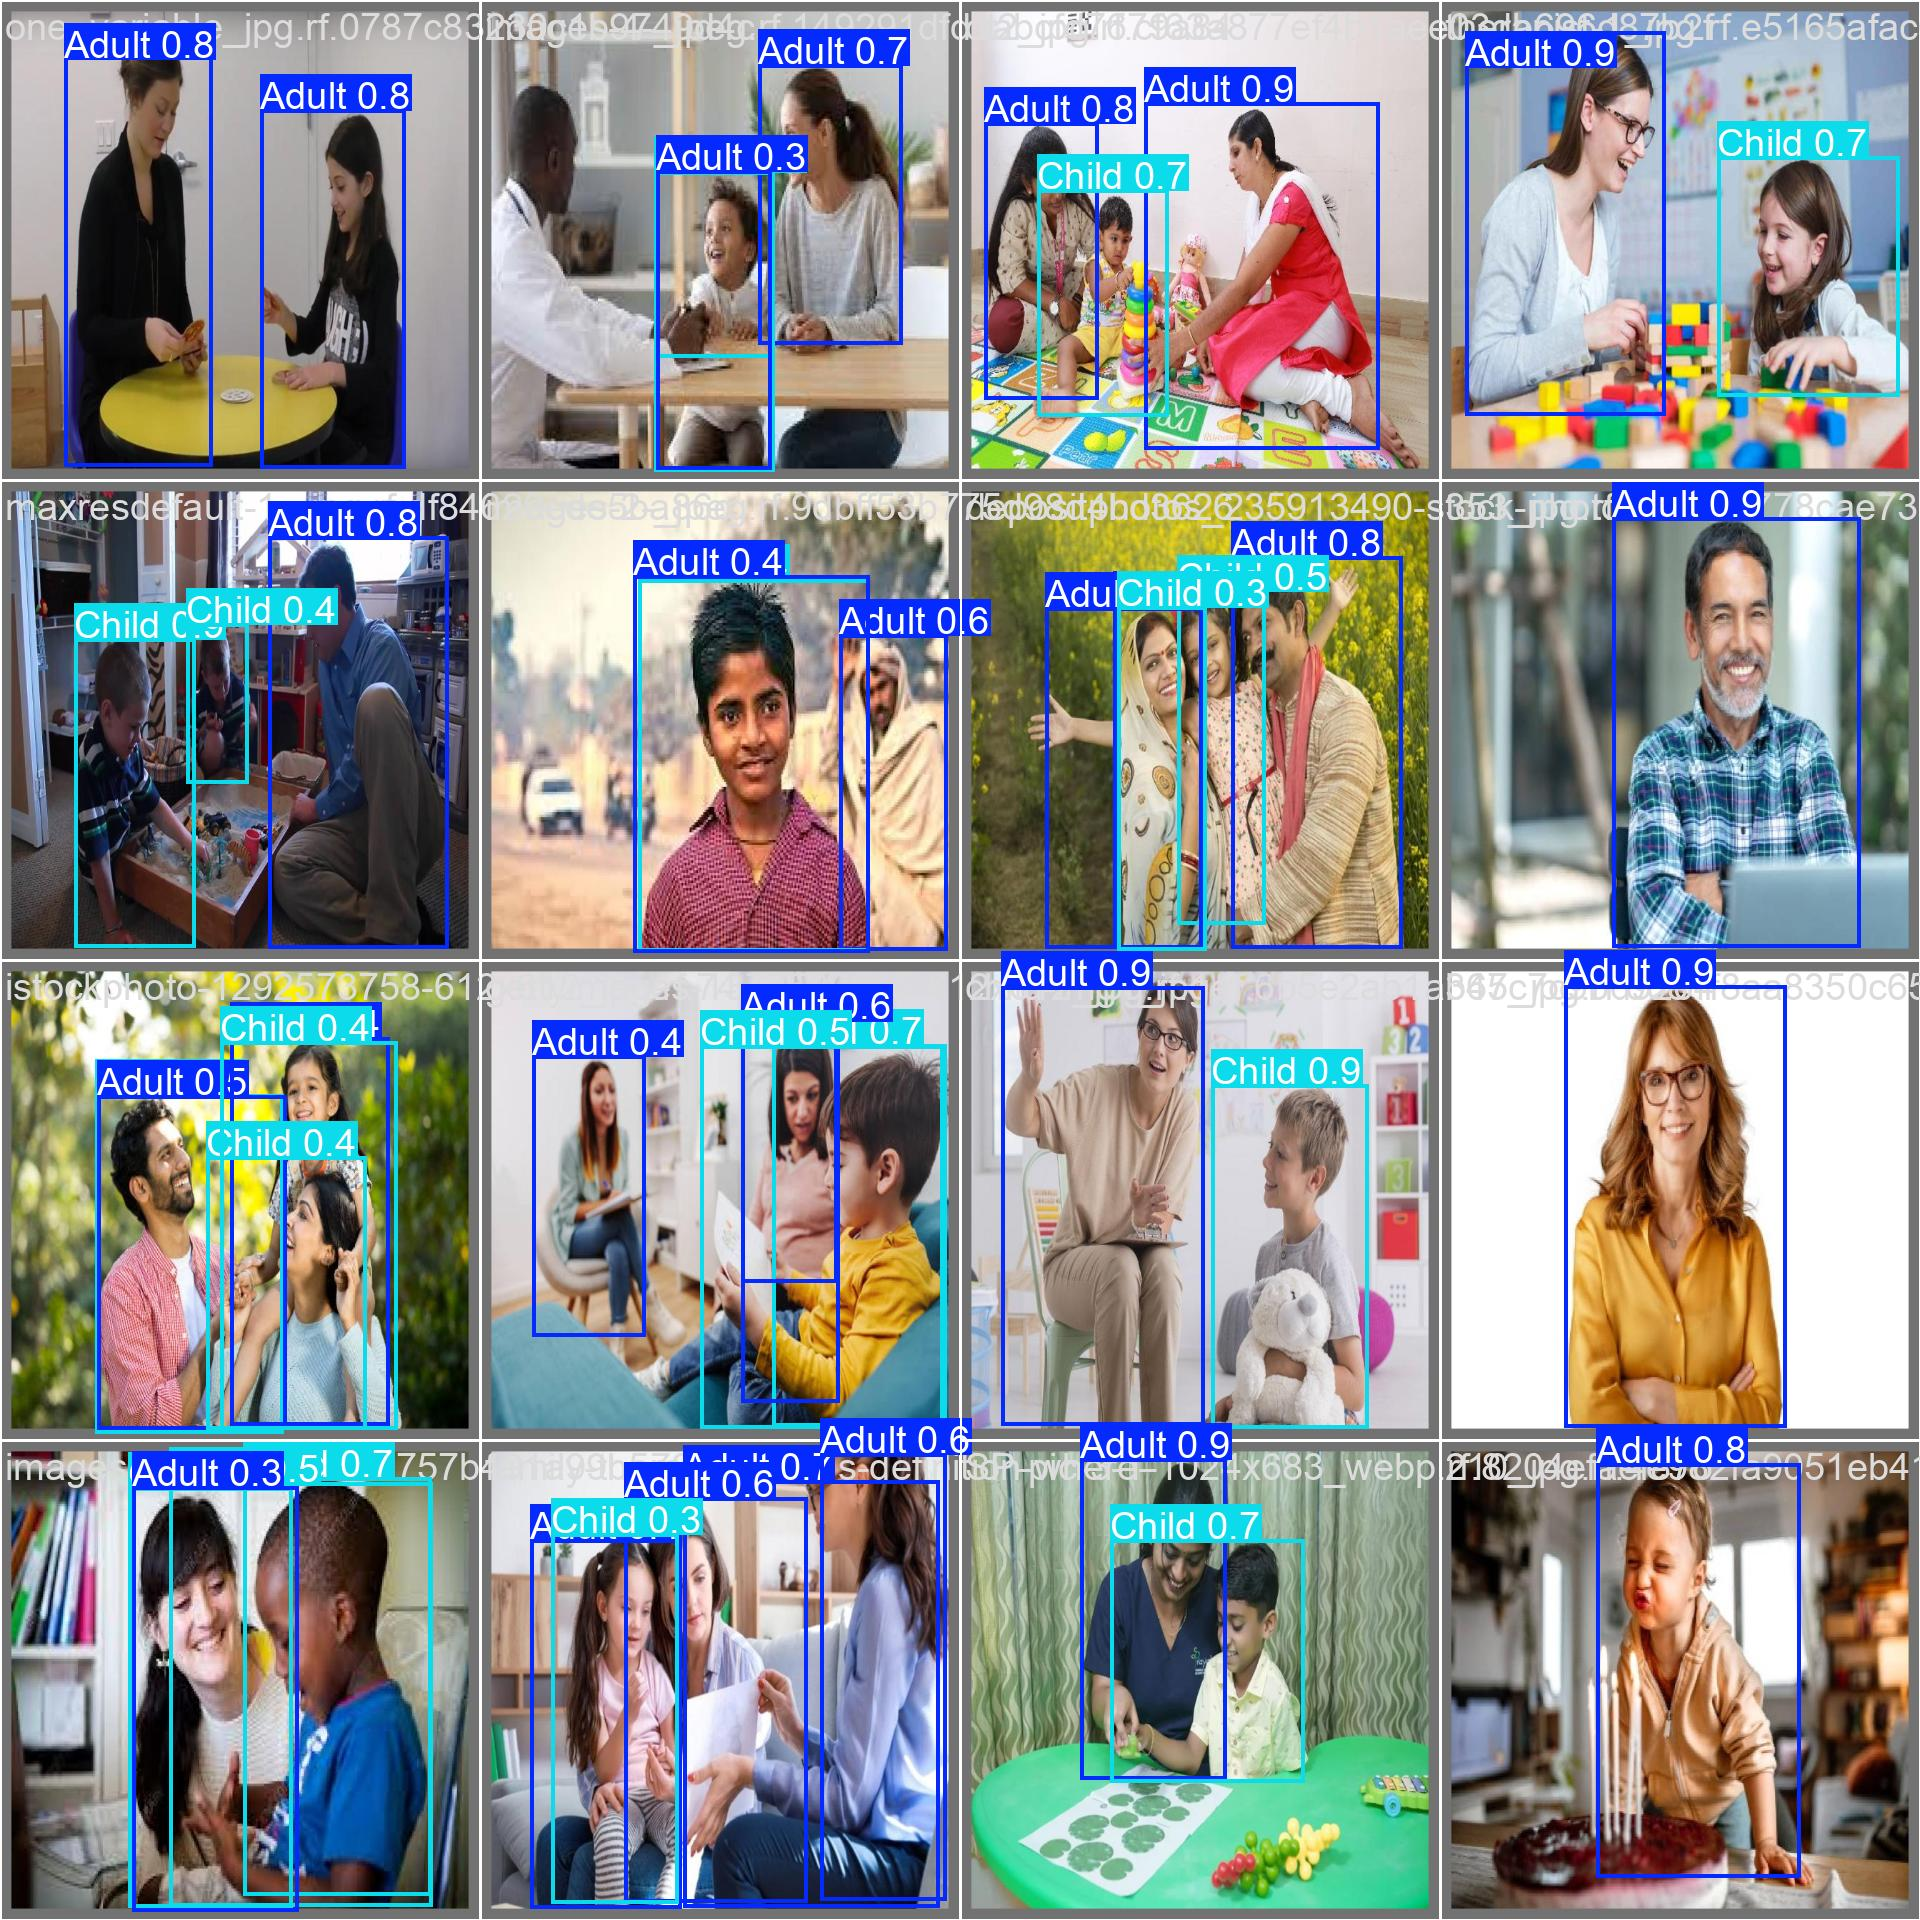

In [14]:
# Viewing validation results
Image('/content/runs/detect/val/val_batch0_pred.jpg',width=600)
Image('/content/runs/detect/val/val_batch1_pred.jpg',width=600)
Image('/content/runs/detect/val/val_batch2_pred.jpg',width=600)

In [21]:
import subprocess
import os

os.environ['LC_ALL'] = 'en_US.UTF-8'
os.environ['LANG'] = 'en_US.UTF-8'

cmd = "yolo task=detect mode=predict model='/content/runs/detect/train2/weights/best.pt' source='image.jpg' conf=0.25"
subprocess.run(cmd, shell=True)

CompletedProcess(args="yolo task=detect mode=predict model='/content/runs/detect/train2/weights/best.pt' source='image.jpg' conf=0.25", returncode=0)

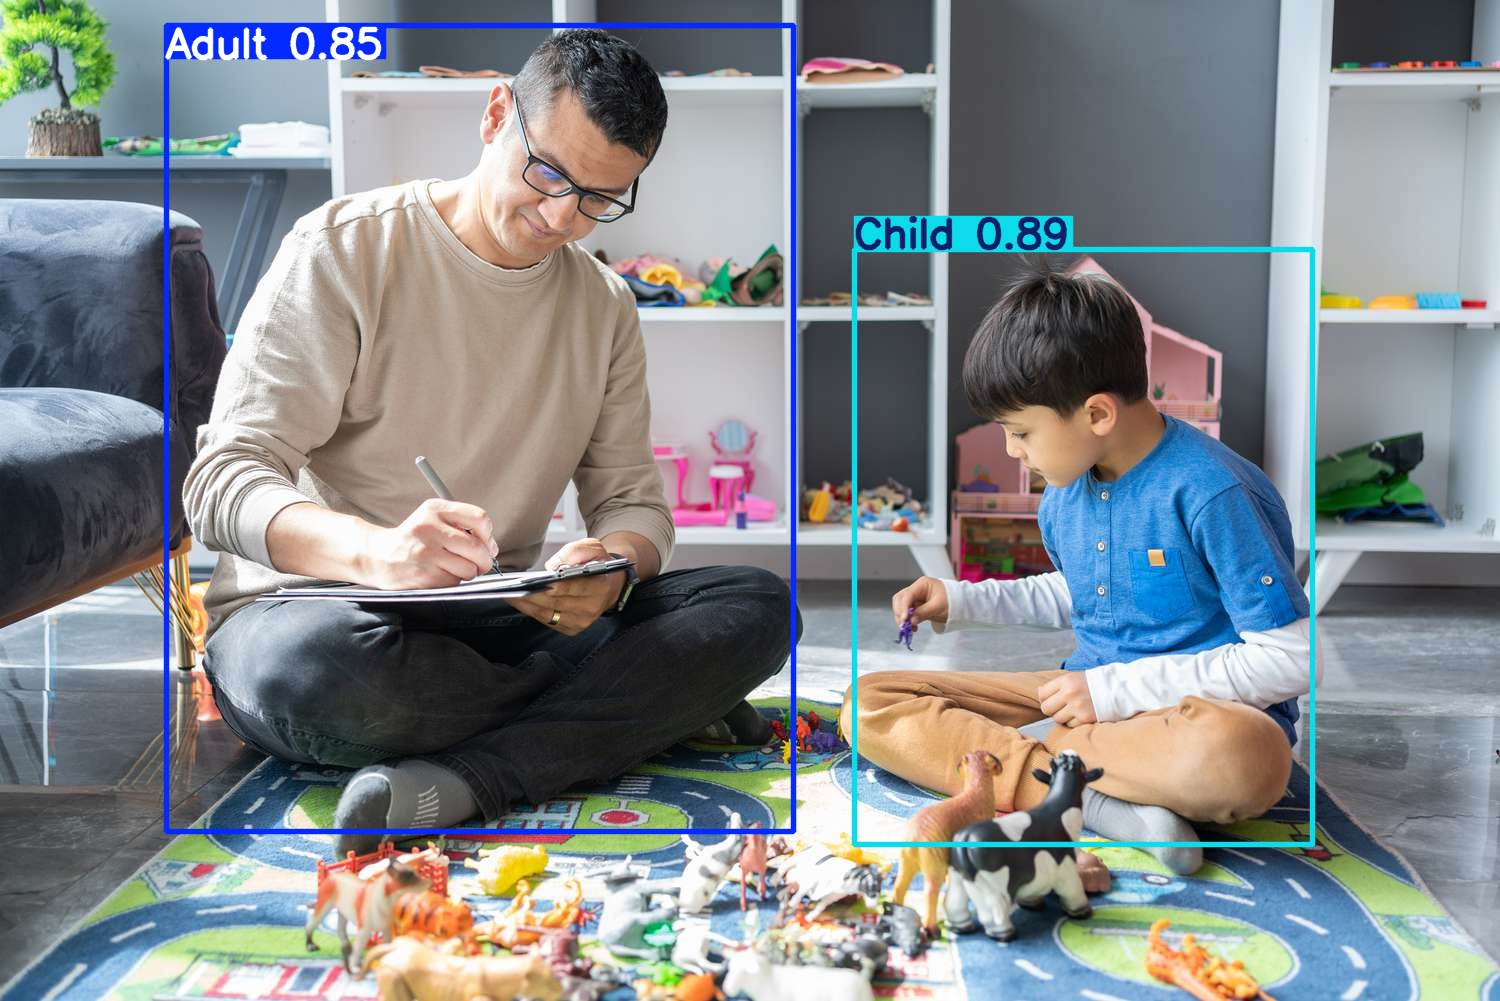

In [22]:
Image('/content/runs/detect/predict/image.jpg',width=600)